# Autour du Covid19

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

## Part 1

### Dowload data

In [198]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
raw_data

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN                      US  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

### Plot data
   * Country are selected in list_country
   * A dictionary is created with 'country' as keys and numpy 1D arrays containing cumulated cases as item
   * For France, United Kingdom and Netherlands the colonies are ignored
   * For China all provinces are collated except for Hong Kong with a specif curve

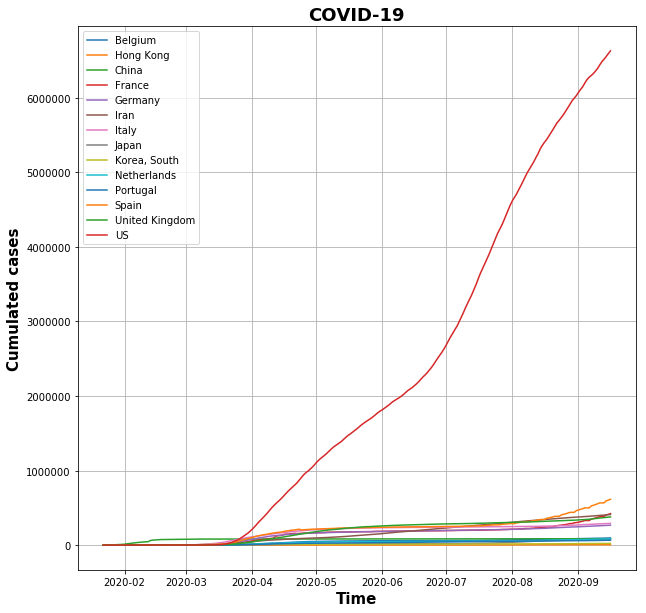

In [199]:
list_country=['Belgium', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea, South', 
             'Netherlands', 'Portugal', 'Spain', 'United Kingdom', 'US']    
dic = {}
date = []

# create a list containing date (converting from string to datetime for plot)
for i in range(4, len(raw_data.keys())):
    date.append(pd.to_datetime(raw_data.keys()[i]).date())

# loop on country listed and retrieve data

for country in list_country:
    row=raw_data[raw_data['Country/Region'] == country]
    
    # to ignore colony for ths county
    if country == 'France' or country == 'United Kingdom' or country == 'Netherlands': 
        row=row[row['Province/State'].isnull()].iloc[:,4:].values[0]
        dic[country] = row
    
    # specific case for china    
    elif country == 'China':
        # create a specific item for Hong Kong
        row_hk=row[row['Province/State'] == 'Hong Kong'].iloc[:,4:].values[0]
        dic['Hong Kong'] = row_hk
        
        # cumul all other provinces of China in China item
        row_china = row[row['Province/State'] != 'Hong Kong'].iloc[:,4:].sum(axis=0).values
        dic['China'] = row_china       
    else:
        row=row.iloc[:,4:].values[0]
        dic[country] = row


# plotting
plt.figure(figsize= (10,10))
for country  in dic.keys():
    plt.plot(date, dic[country], label=country)
plt.legend(loc='upper left');
plt.grid();
plt.xlabel('Time', fontweight='bold', fontsize='15'); 
plt.ylabel('Cumulated cases', fontweight='bold', fontsize='15'); 
plt.title('COVID-19 - cases', fontweight='bold', fontsize='18');

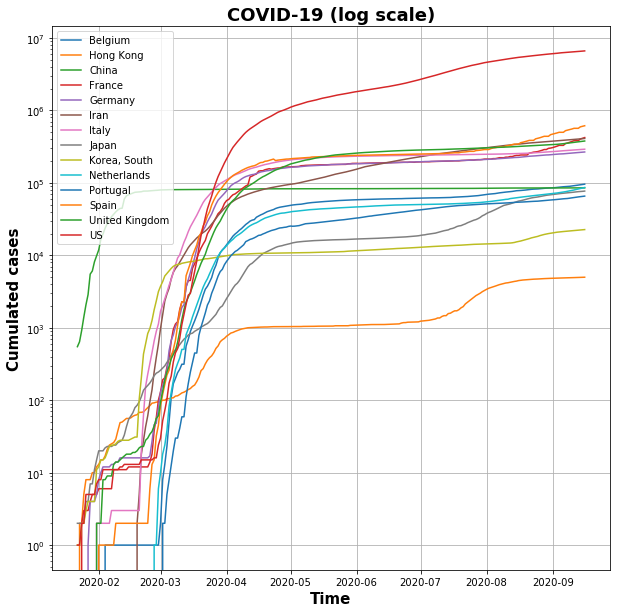

In [200]:
plt.figure(figsize= (10,10))
for country  in dic.keys():
    plt.plot(date, dic[country], label=country)
plt.legend(loc='upper left');
plt.grid();
plt.xlabel('Time', fontweight='bold', fontsize='15'); 
plt.ylabel('Cumulated cases', fontweight='bold', fontsize='15'); 
plt.title('COVID-19 - cases (log scale)', fontweight='bold', fontsize='18');
plt.yscale('log')

## Part 2

In [202]:
raw_data2 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
raw_data2

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
236                           NaN                Thailand  15.870032   
237                           NaN             Timor-Leste  -8.874217   
238                           NaN                    Togo   8.619500   
239                           NaN     Trinidad and Tobago  10.691800   
240                           NaN                 Tunisia  33.886917   
241                           NaN                  Turkey  38.963700   
242                           NaN                      US  40.000000   
243                           NaN                  Uganda   1.373333   
244                           NaN                 Ukraine  48.379400   
245                           NaN    United Arab Emirates  23.424076   
246                      Anguilla          United Kingdom  18.220600   
247                       Bermuda          United Kingdom  32.307800   
248        British Virgin Islands          United Kingdom  18.420700   
249                Cayman Islands          United Kingdom  19.313300   
250               Channel Islands          United Kingdom  49.372300   
251   Falkland Islands (Malvinas)          United Kingdom -51.796300   
252                     Gibraltar          United Kingdom  36.140800   
253                   Isle of Man          United Kingdom  54.236100   
254                    Montserrat          United Kingdom  16.742498   
255      Turks and Caicos Islands          United Kingdom  21.694000   
256                           NaN          United Kingdom  55.378100   
257                           NaN                 Uruguay -32.522800   
258                           NaN              Uzbekistan  41.377491   
259                           NaN               Venezuela  

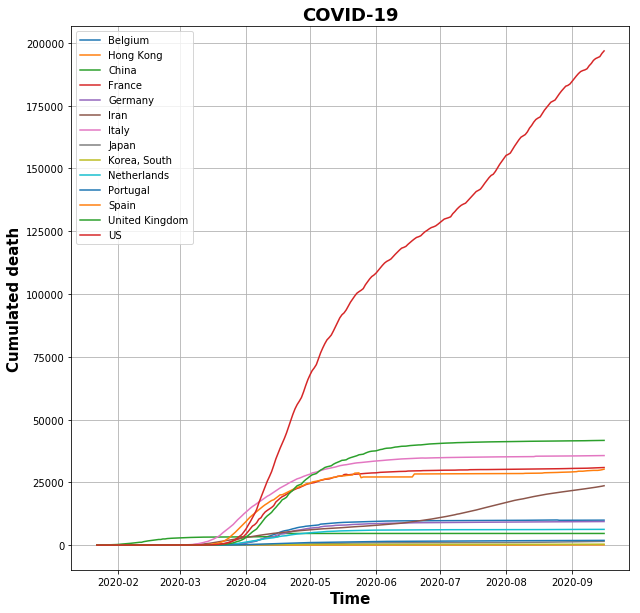

In [206]:
list_country=['Belgium', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea, South', 
             'Netherlands', 'Portugal', 'Spain', 'United Kingdom', 'US']    
dic2 = {}
date = []

# create a list containing date (converting from string to datetime for plot)
for i in range(4, len(raw_data.keys())):
    date.append(pd.to_datetime(raw_data.keys()[i]).date())

# loop on country listed and retrieve data

for country in list_country:
    row=raw_data2[raw_data2['Country/Region'] == country]
    
    # to ignore colony for ths county
    if country == 'France' or country == 'United Kingdom' or country == 'Netherlands': 
        row=row[row['Province/State'].isnull()].iloc[:,4:].values[0]
        dic2[country] = row
    
    # specific case for china    
    elif country == 'China':
        # create a specific item for Hong Kong
        row_hk=row[row['Province/State'] == 'Hong Kong'].iloc[:,4:].values[0]
        dic2['Hong Kong'] = row_hk
        
        # cumul all other provinces of China in China item
        row_china = row[row['Province/State'] != 'Hong Kong'].iloc[:,4:].sum(axis=0).values
        dic2['China'] = row_china       
    else:
        row=row.iloc[:,4:].values[0]
        dic2[country] = row


# plotting
plt.figure(figsize= (10,10))
for country  in dic2.keys():
    plt.plot(date, dic2[country], label=country)
plt.legend(loc='upper left');
plt.grid();
plt.xlabel('Time', fontweight='bold', fontsize='15'); 
plt.ylabel('Cumulated death', fontweight='bold', fontsize='15'); 
plt.title('COVID-19 -  death', fontweight='bold', fontsize='18');

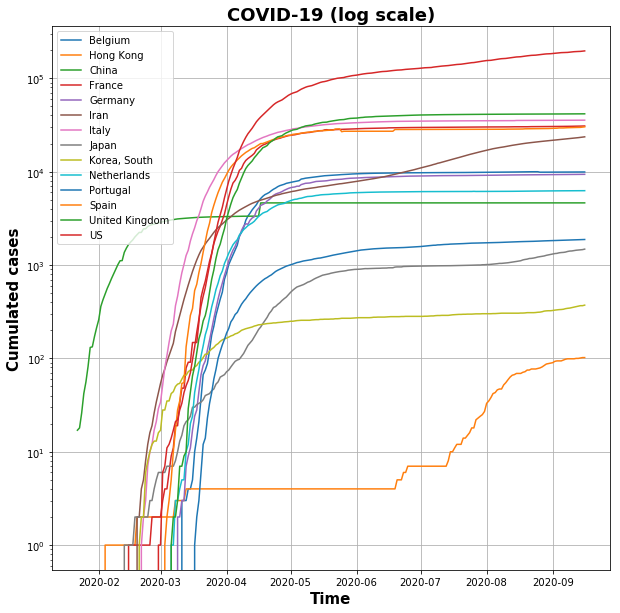

In [205]:
plt.figure(figsize= (10,10))
for country  in dic.keys():
    plt.plot(date, dic2[country], label=country)
plt.legend(loc='upper left');
plt.grid();
plt.xlabel('Time', fontweight='bold', fontsize='15'); 
plt.ylabel('Cumulated death', fontweight='bold', fontsize='15'); 
plt.title('COVID-19 - death (log scale)', fontweight='bold', fontsize='18');
plt.yscale('log')

# Part 3

### Plot data
   * Country are selected in list_country (Iran is ignored)
   * A dictionary is created with 'country' as keys and numpy 1D arrays containing cumulated cases as item
   * Another dictionary is created with 'country' as keys and number of bed for 1000 inhabitans as item
   * data from hospital are drawn from graph 9.6 of this [Web page](https://www.oecd-ilibrary.org/sites/5f5b6833-fr/1/2/9/3/index.html?itemId=/content/publication/5f5b6833-fr&_csp_=65ac94c7f4b2dbbf68a7eef9e558ed12&itemIGO=oecd&itemContentType=book) (data from 2017)
   * For France, United Kingdom and Netherlands the colonies are ignored
   * For China all provinces are collated 
   * Hong Kong detah are ignored 
   * For plotting number of death is normalized for 1000 inhabitans

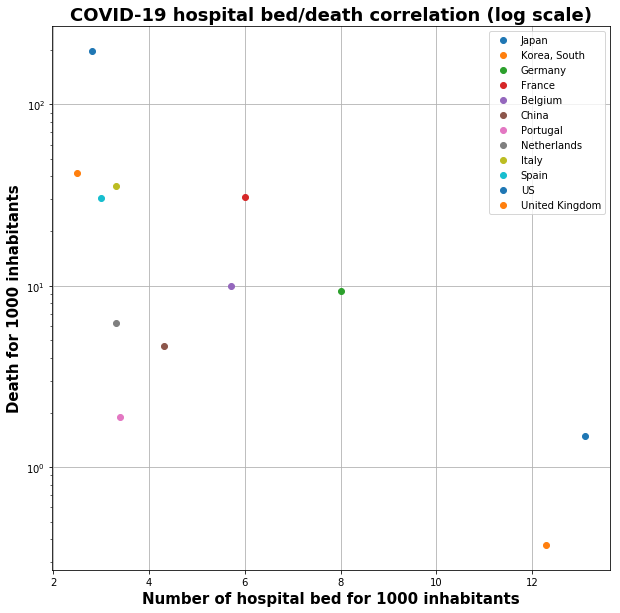

In [234]:
dic_bed={}

dic_bed['Japan'] = 13.1
dic_bed['Korea, South'] = 12.3
dic_bed['Germany'] = 8.0
dic_bed['France'] = 6.0
dic_bed['Belgium'] = 5.7
dic_bed['China'] = 4.3
dic_bed['Portugal'] = 3.4
dic_bed['Netherlands'] = 3.3
dic_bed['Italy'] = 3.3
dic_bed['Spain'] = 3.0
dic_bed['US'] = 2.8
dic_bed['United Kingdom'] = 2.5

plt.figure(figsize= (10,10))
for country  in dic_bed.keys():
    plt.plot(dic_bed[country], dic2[country][-1]/1000, 'o', label=country)
plt.legend(loc='upper right');
plt.grid();
plt.xlabel('Number of hospital bed for 1000 inhabitants', fontweight='bold', fontsize='15'); 
plt.ylabel('Death for 1000 inhabitants', fontweight='bold', fontsize='15'); 
plt.title('COVID-19 - hospital bed/death correlation (log scale)', fontweight='bold', fontsize='18');
plt.yscale('log')